<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/Learn_Python_by_analying_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [1]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Downloading GitHub Data set 

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [3]:

### Select data path
#fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

fullpath1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df1 = pd.read_csv(fullpath1, error_bad_lines=False)

#fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
fullpath2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## DataFrame is Python Pandas word for Excel spreadsheet

# Part 2. Explore USA time series by counties

In [4]:
df1.shape

(3342, 898)

view the dataframe

In [5]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16211,16279,16313,16330,16360,16400,16400,16400
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57726,57887,58009,58169,58293,58372,58372,58372
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5782,5795,5813,5818,5825,5832,5832,5832
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6611,6621,6630,6648,6654,6663,6663,6663
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15207,15222,15246,15249,15272,15283,15283,15283


How to find out the columns?

In [ ]:
# dir(df1)

In [ ]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '6/16/22', '6/17/22', '6/18/22', '6/19/22', '6/20/22', '6/21/22',
       '6/22/22', '6/23/22', '6/24/22', '6/25/22'],
      dtype='object', length=897)

In [ ]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10554,10554,10554,10554,10554,10699,10699,10699,10699,10699
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5753,5753,5753,5753,5753,5784,5784,5784,5784,5784
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2471,2471,2471,2471,2471,2490,2490,2490,2490,2490
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1632,1632,1632,1632,1632,1641,1641,1641,1641,1641


In [6]:
df1

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16211,16279,16313,16330,16360,16400,16400,16400
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57726,57887,58009,58169,58293,58372,58372,58372
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5782,5795,5813,5818,5825,5832,5832,5832
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6611,6621,6630,6648,6654,6663,6663,6663
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15207,15222,15246,15249,15272,15283,15283,15283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10554,10554,10554,10554,10699,10699,10699,10699,10699,10699
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5753,5753,5753,5753,5784,5784,5784,5784,5784,5784
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2471,2471,2471,2471,2490,2490,2490,2490,2490,2490


In [7]:
df1['Lat'][3337:3339]

3337    43.935225
3338    41.287818
Name: Lat, dtype: float64

In [8]:
df1.iloc[3337:3340, 4:7] #be aware that Python is typically end-exclusive! 

,FIPS,Admin2,Province_State
3337,56039.0,Teton,Wyoming
3338,56041.0,Uinta,Wyoming
3339,90056.0,Unassigned,Wyoming


How to find out dataframe dimensions

In [10]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3342, 898)


How many "province states" are there in this data set?

In [11]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [12]:
df1.iloc[:, 11:].max().max()

3088482

In [ ]:
df1.idxmax

<bound method DataFrame.idxmax of            UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 6/16/22  6/17/22  6/18/22  \
0                US  32.539527  -86.

Find out the largest value for column '10/20/21'

In [13]:
df1["6/26/22"].max()

3088482

## Find out which row has the largest value. 

In [14]:
df1.loc[df1['6/26/22']==3088482]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
215,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,3057004,3057004,3057004,3069037,3071314,3076849,3082401,3088482,3088482,3088482


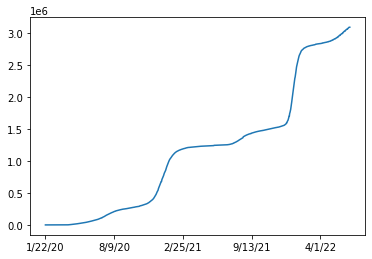

In [15]:
LA = df1.iloc[215, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [16]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16211,16211,16211,16279,16313,16330,16360,16400,16400,16400
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57726,57726,57726,57887,58009,58169,58293,58372,58372,58372
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5782,5782,5782,5795,5813,5818,5825,5832,5832,5832
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6611,6611,6611,6621,6630,6648,6654,6663,6663,6663
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15207,15207,15207,15222,15246,15249,15272,15283,15283,15283


In [20]:
df1.iloc[:, 11:].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,0,0,0,0,0,0,0,0,0,0,...,16211,16211,16211,16279,16313,16330,16360,16400,16400,16400
1,0,0,0,0,0,0,0,0,0,0,...,57726,57726,57726,57887,58009,58169,58293,58372,58372,58372
2,0,0,0,0,0,0,0,0,0,0,...,5782,5782,5782,5795,5813,5818,5825,5832,5832,5832
3,0,0,0,0,0,0,0,0,0,0,...,6611,6611,6611,6621,6630,6648,6654,6663,6663,6663
4,0,0,0,0,0,0,0,0,0,0,...,15207,15207,15207,15222,15246,15249,15272,15283,15283,15283


In [21]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
6/22/22,16330,58169,5818
6/23/22,16360,58293,5825
6/24/22,16400,58372,5832
6/25/22,16400,58372,5832


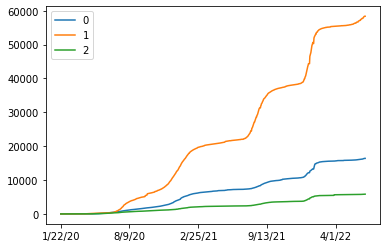

In [22]:
UScases.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d1b8fc510>,
      dtype=object)

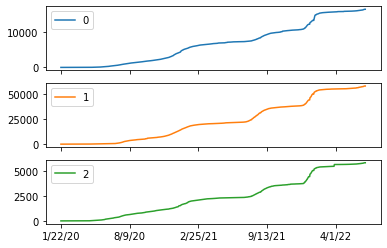

In [23]:
UScases.plot(subplots=True)

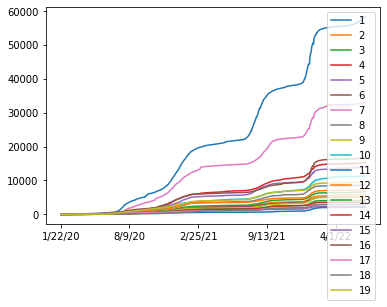

In [24]:
df1.iloc[1:20, 11:].transpose().plot()

## Add meaningful index to the dataframe

In [25]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3342)

In [ ]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(3342, 897)

In [ ]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16193,16211,16211,16211,16279,16313,16330,16360,16400,16400
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57637,57726,57726,57726,57887,58009,58169,58293,58372,58372
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5771,5782,5782,5782,5795,5813,5818,5825,5832,5832
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6596,6611,6611,6611,6621,6630,6648,6654,6663,6663
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15188,15207,15207,15207,15222,15246,15249,15272,15283,15283


In [ ]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

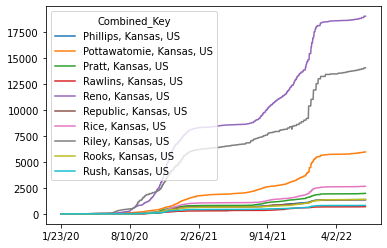

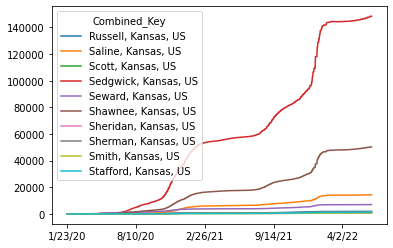

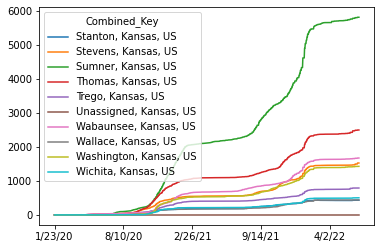

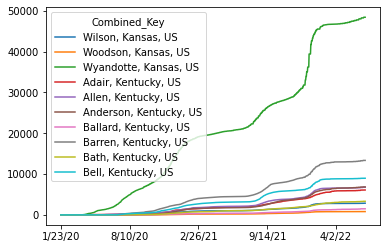

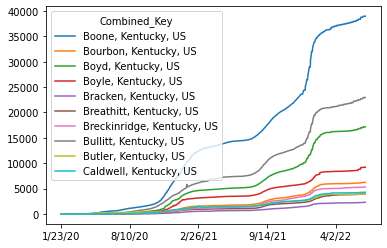

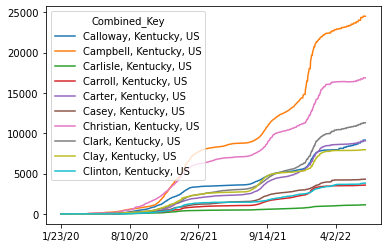

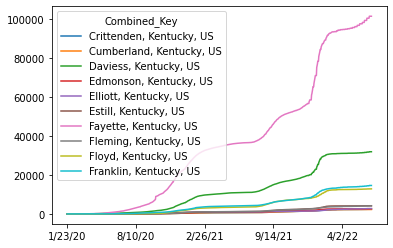

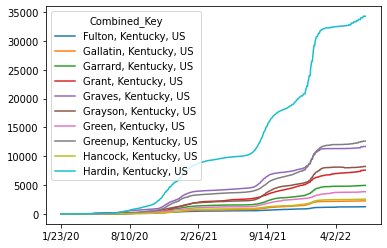

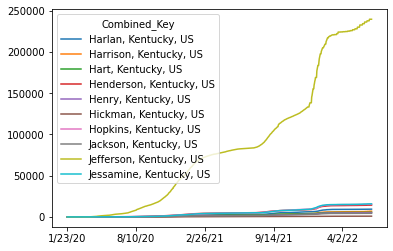

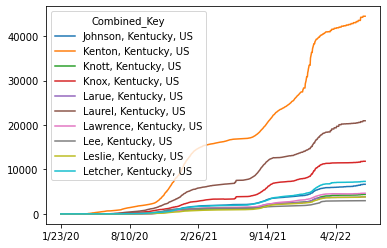

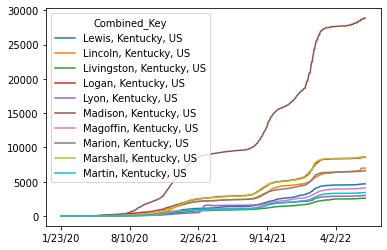

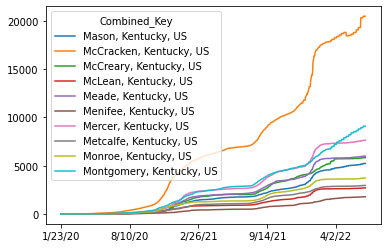

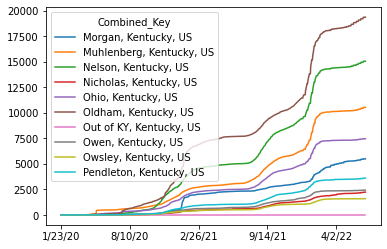

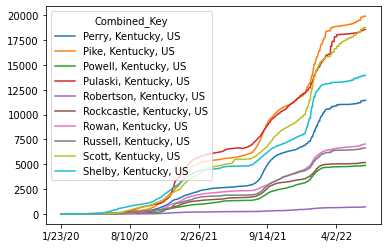

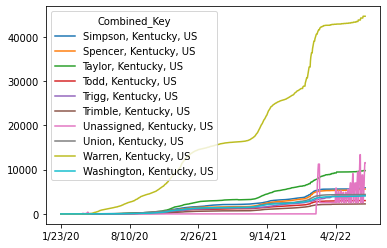

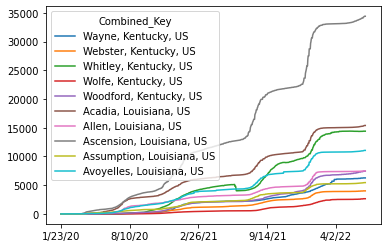

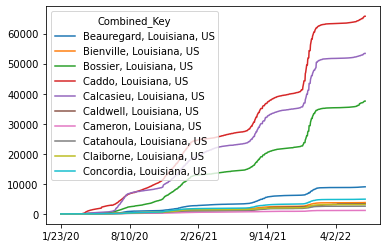

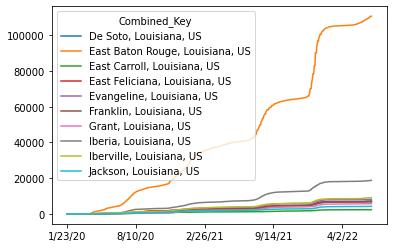

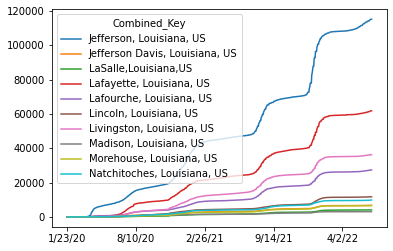

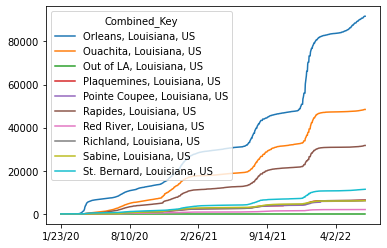

In [28]:
step = 10
for i in range(1000, 1200, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [ ]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,10554,10554,10554,10554,10554,10699,10699,10699,10699,10699
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5753,5753,5753,5753,5753,5784,5784,5784,5784,5784
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2471,2471,2471,2471,2471,2490,2490,2490,2490,2490
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1632,1632,1632,1632,1632,1641,1641,1641,1641,1641


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

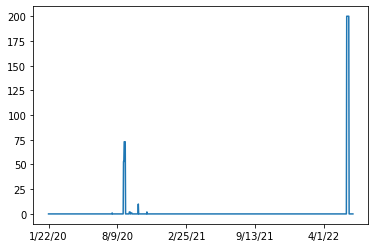

In [ ]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [29]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape

(52, 897)

In [30]:

df1.loc[ df1.index.str.contains('Unassigned'), ]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,...,1043,1043,1043,1043,1043,1109,1109,1109,1109,1109
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,27550,27569,27595,27601,27619,27654,27681,27714,27743,27775
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,...,3789,3789,3789,3789,4750,4750,4750,2938,2938,2938
"Unassigned, Colorado, US",84090008,US,USA,840,90008.0,Unassigned,Colorado,US,0.0,0.0,...,134,134,134,134,134,134,135,135,135,135
"Unassigned, Connecticut, US",84090009,US,USA,840,90009.0,Unassigned,Connecticut,US,0.0,0.0,...,2598,2598,2598,2607,2617,3344,3284,2616,2616,2616
"Unassigned, Delaware, US",84090010,US,USA,840,90010.0,Unassigned,Delaware,US,0.0,0.0,...,967,967,967,972,972,973,977,979,979,979
"Unassigned, District of Columbia, US",84090011,US,USA,840,90011.0,Unassigned,District of Columbia,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [ ]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [ ]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [ ]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

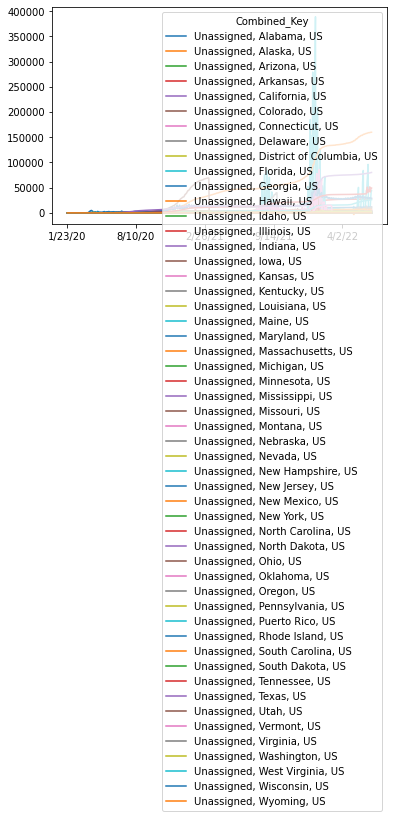

In [31]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

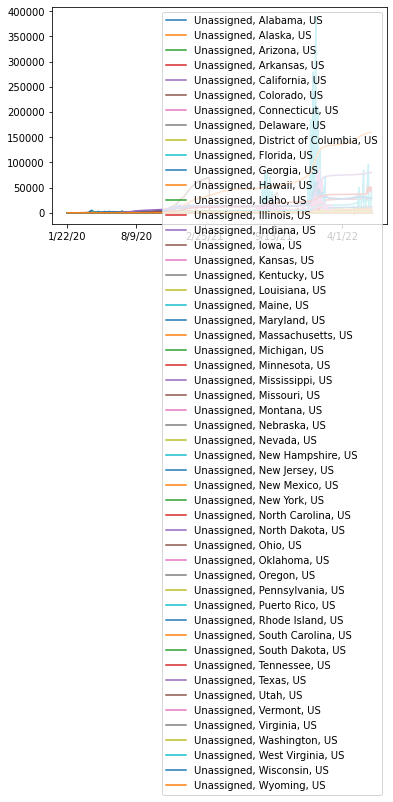

In [ ]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [ ]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,...,102866,102866,102866,102866,102866,102866,103460,103460,103460,103460


In [ ]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,...,102866,102866,102866,102866,102866,102866,103460,103460,103460,103460


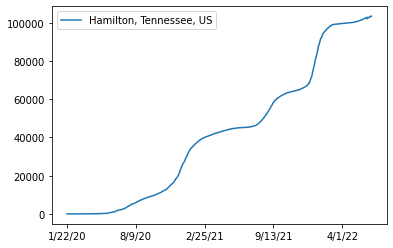

In [ ]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

# Part 3. Daily cases at Hamilton County
## Examine the daily confirmed cases in Hamilton County, TN

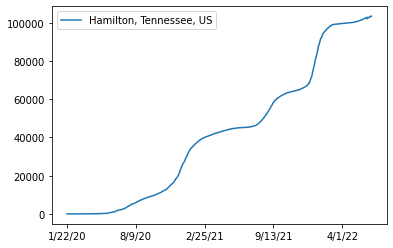

In [ ]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [ ]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,...,102866,102866,102866,102866,102866,102866,103460,103460,103460,103460


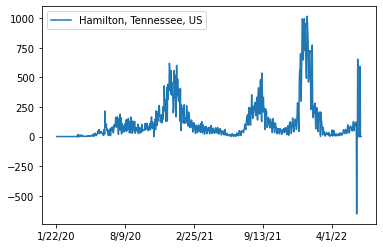

In [ ]:
df_Hamilton.transpose().diff(axis=0).plot()

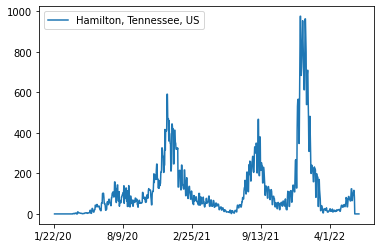

In [ ]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

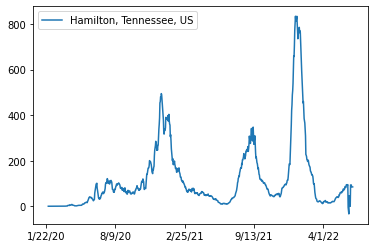

In [ ]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

#Part 4. Overlay Google Mobility estimate with daily COVID-19 cases. 

## Use magjic commands to download data

In [ ]:
! wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip 

--2022-06-27 00:18:39--  https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
Resolving www.gstatic.com (www.gstatic.com)... 74.125.142.94, 2607:f8b0:400e:c08::5e
Connecting to www.gstatic.com (www.gstatic.com)|74.125.142.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87091028 (83M) [application/zip]
Saving to: ‘Region_Mobility_Report_CSVs.zip.1’

Region_Mobility_Rep 100%[===================>]  83.06M  7.30MB/s    in 9.2s    

2022-06-27 00:18:48 (8.99 MB/s) - ‘Region_Mobility_Report_CSVs.zip.1’ saved [87091028/87091028]



In [ ]:
! unzip /content/Region_Mobility_Report_CSVs.zip

Archive:  /content/Region_Mobility_Report_CSVs.zip
replace 2020_AE_Region_Mobility_Report.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! ls *US*csv

2020_US_Region_Mobility_Report.csv  2022_US_Region_Mobility_Report.csv
2021_US_Region_Mobility_Report.csv


## Read csv into pandas dataframe, and merge them

In [ ]:
df_US20 = pd.read_csv( "2020_US_Region_Mobility_Report.csv")
df_US21 = pd.read_csv( "2021_US_Region_Mobility_Report.csv")
df_US22 = pd.read_csv( "2022_US_Region_Mobility_Report.csv")

In [ ]:
df_US = pd.concat( [df_US20, df_US21, df_US22] )
df_US.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [ ]:
df_US.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
452216,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-17,NaN,NaN,NaN,NaN,-37.0,NaN
452217,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-20,NaN,NaN,NaN,NaN,-38.0,NaN
452218,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-21,NaN,NaN,NaN,NaN,-32.0,NaN
452219,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-22,NaN,NaN,NaN,NaN,-40.0,NaN
452220,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2022-06-23,NaN,NaN,NaN,NaN,-34.0,NaN


## convert date into objects

In [ ]:
df_US.index = pd.to_datetime(df_US.date)
df_US.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2022-06-10', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-20', '2022-06-21',
               '2022-06-22', '2022-06-23'],
              dtype='datetime64[ns]', name='date', length=2216246, freq=None)

## Pick Hamilton County, Tennessee

### Hamilton TN moblility

In [ ]:
#df_US.loc[ df_US.sub_region_1=='Tennessee'  ]

df_Hamilton_GM = df_US.loc[ ( df_US.sub_region_1=='Tennessee' ) & (df_US.sub_region_2=='Hamilton County') ]
df_Hamilton_GM.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2022-06-19,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-19,-3.0,7.0,84.0,-61.0,-20.0,-1.0
2022-06-20,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-20,-7.0,3.0,72.0,-63.0,-36.0,7.0
2022-06-21,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-21,-7.0,3.0,97.0,-55.0,-28.0,5.0
2022-06-22,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-22,-8.0,5.0,72.0,-54.0,-29.0,5.0
2022-06-23,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-23,-7.0,5.0,68.0,-57.0,-29.0,6.0


## Hamilton, TN COVID

In [ ]:
df_Hamilton_COVID = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().diff(axis=0).rolling(window=7).mean()

type(df_Hamilton_COVID)
df_Hamilton_COVID.tail()

,"Hamilton, Tennessee, US"
6/21/22,93.428571
6/22/22,84.857143
6/23/22,84.857143
6/24/22,84.857143
6/25/22,84.857143


In [ ]:
df_Hamilton_COVID.index = pd.to_datetime(df_Hamilton_COVID.index)
df_Hamilton_COVID.rename(columns={"Hamilton, Tennessee, US":"daily_cases"}, inplace=True)
df_Hamilton_COVID.tail()

,daily_cases
2022-06-21,93.428571
2022-06-22,84.857143
2022-06-23,84.857143
2022-06-24,84.857143
2022-06-25,84.857143


### Merge mobiligy with COVID data for Hamilton, TN

In [ ]:
df_Hamilton = pd.merge(df_Hamilton_COVID, df_Hamilton_GM, left_index=True, right_index=True)
df_Hamilton.tail()

,daily_cases,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2022-06-19,93.428571,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-19,-3.0,7.0,84.0,-61.0,-20.0,-1.0
2022-06-20,93.428571,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-20,-7.0,3.0,72.0,-63.0,-36.0,7.0
2022-06-21,93.428571,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-21,-7.0,3.0,97.0,-55.0,-28.0,5.0
2022-06-22,84.857143,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-22,-8.0,5.0,72.0,-54.0,-29.0,5.0
2022-06-23,84.857143,US,United States,Tennessee,Hamilton County,NaN,NaN,47065.0,ChIJuwVDlj2XYIgR_jxnvongYg4,2022-06-23,-7.0,5.0,68.0,-57.0,-29.0,6.0


## Plot

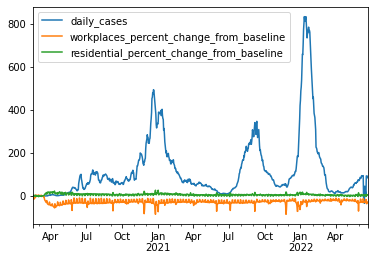

In [ ]:
df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f616ea15590>,
      dtype=object)

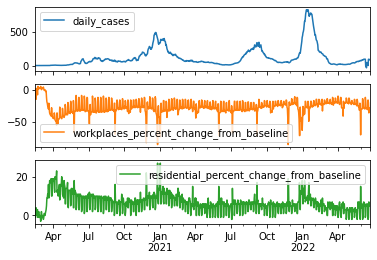

In [ ]:
df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']].plot(subplots=True)

### Plot with normalized data and moving windows

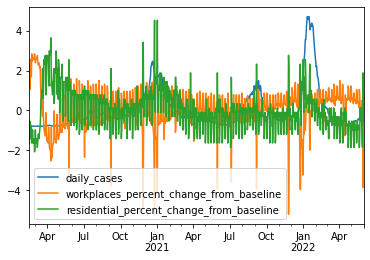

In [ ]:
df_Hamilton2 = df_Hamilton[['daily_cases', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

df_Hamilton2 = ( df_Hamilton2 - df_Hamilton2.mean() ) / df_Hamilton2.std() 

df_Hamilton2.loc['2020-02-01':'2022-06-01', ].plot()

 Try to remove the weekly fluctuation by 15-day moving window

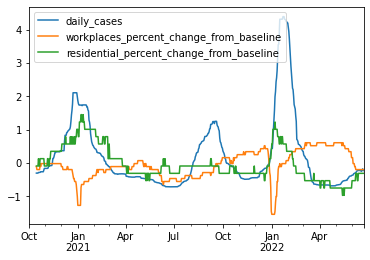

In [ ]:
df_Hamilton2.loc['2020-10-01':'2022-07-01', ].rolling(window=15).median().plot()

# Part 5. Examine the cases by States.

In [ ]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3342, dtype: object

In [ ]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [ ]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1333137,1334981,1334981,1334981,1338177,1340110,1342150,1344233,1346268,1346268
Alaska,0,0,0,0,0,0,0,0,0,0,...,266731,266731,266731,266731,266731,266731,269311,269311,269311,269311
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6269,6342,6342,6342,6342,6342,6342,6342,6414,6414
Arizona,0,0,0,0,1,1,1,1,1,1,...,2093680,2093680,2093680,2093680,2093680,2093680,2109053,2109053,2109053,2109053
Arkansas,0,0,0,0,0,0,0,0,0,0,...,853229,854009,854717,855292,855543,856307,857119,858553,859615,860503


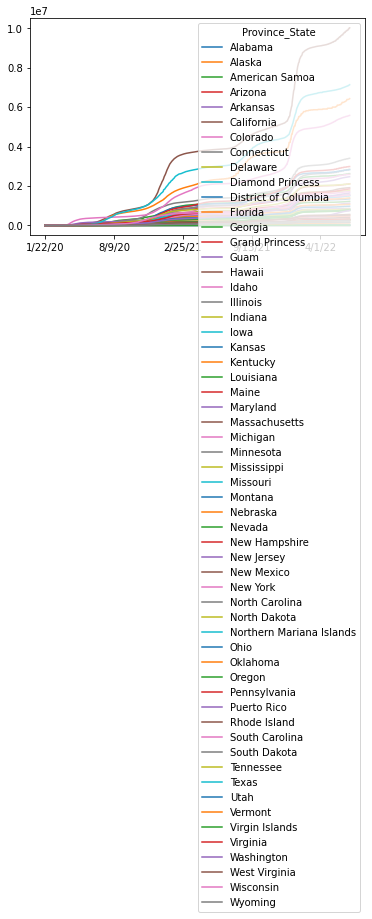

In [ ]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f616bfa2f50>,
      dtype=object)

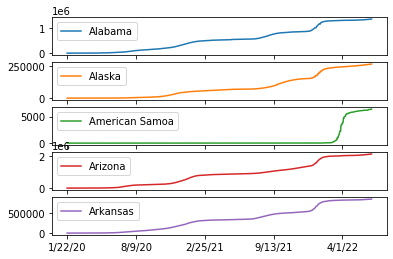

In [ ]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f616bdea590>],
      dtype=object)

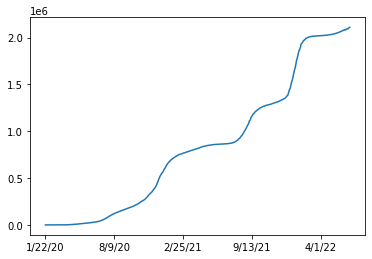

In [ ]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [ ]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1333137,1334981,1334981,1334981,1338177,1340110,1342150,1344233,1346268,1346268
Alaska,0,0,0,0,0,0,0,0,0,0,...,266731,266731,266731,266731,266731,266731,269311,269311,269311,269311
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6269,6342,6342,6342,6342,6342,6342,6342,6414,6414
Arizona,0,0,0,0,1,1,1,1,1,1,...,2093680,2093680,2093680,2093680,2093680,2093680,2109053,2109053,2109053,2109053
Arkansas,0,0,0,0,0,0,0,0,0,0,...,853229,854009,854717,855292,855543,856307,857119,858553,859615,860503


In [ ]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

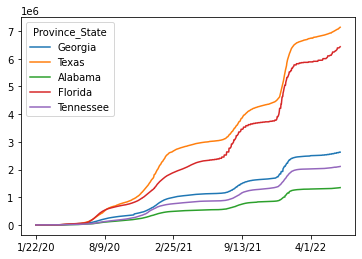

In [ ]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

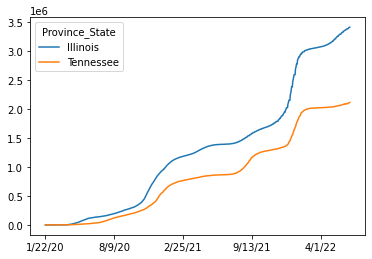

In [ ]:
df_by_state.transpose()[['Illinois', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

## How to examine the new cases daily? 

### diff() on a test dataframe

In [ ]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [ ]:
df_test.diff(axis=0) #by row

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,8.0,8.0,8.0,10.0
2,10.0,10.0,10.0,8.0
3,8.0,8.0,8.0,8.0


In [ ]:
df_test.diff(axis=1) #by column

,A,B,C,D
0,NaN,2,2,2
1,NaN,2,2,4
2,NaN,2,2,2
3,NaN,2,2,2


### diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [ ]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1333137,1334981,1334981,1334981,1338177,1340110,1342150,1344233,1346268,1346268
Alaska,0,0,0,0,0,0,0,0,0,0,...,266731,266731,266731,266731,266731,266731,269311,269311,269311,269311
American Samoa,0,0,0,0,0,0,0,0,0,0,...,6269,6342,6342,6342,6342,6342,6342,6342,6414,6414
Arizona,0,0,0,0,1,1,1,1,1,1,...,2093680,2093680,2093680,2093680,2093680,2093680,2109053,2109053,2109053,2109053
Arkansas,0,0,0,0,0,0,0,0,0,0,...,853229,854009,854717,855292,855543,856307,857119,858553,859615,860503


In [ ]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0,0,0,0,0,0,0,0,0,...,1685,1844,0,0,3196,1933,2040,2083,2035,0
Alaska,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2580,0,0,0
American Samoa,NaN,0,0,0,0,0,0,0,0,0,...,-1,73,0,0,0,0,0,0,72,0
Arizona,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,15373,0,0,0
Arkansas,NaN,0,0,0,0,0,0,0,0,0,...,1000,780,708,575,251,764,812,1434,1062,888


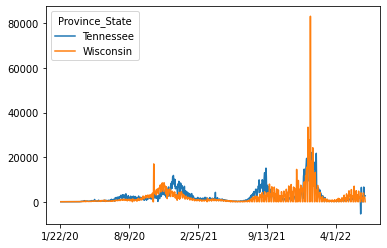

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [ ]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,NaN,NaN
1/24/20,NaN,NaN
1/25/20,0.000000,0.0
1/26/20,0.000000,0.0
...,...,...
6/21/22,2196.666667,0.0
6/22/22,2915.666667,860.0
6/23/22,3823.666667,860.0
6/24/22,2513.000000,860.0


In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

Province_State,Tennessee,Alaska
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


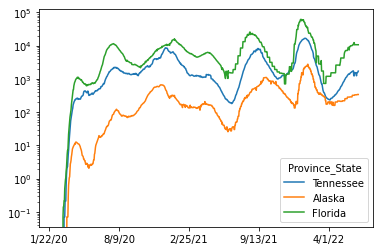

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f616bf61d50>,
      dtype=object)

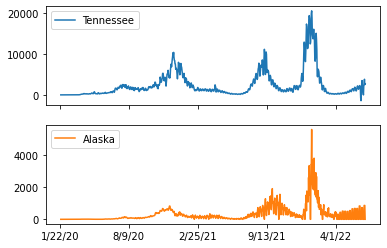

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

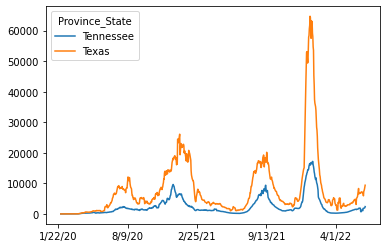

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

Province_State,Tennessee,Texas
1/22/20,NaN,NaN
1/23/20,0.0,0.0
1/24/20,0.0,0.0
1/25/20,0.0,0.0
1/26/20,0.0,0.0


# Part 6. Explore COVID-19 confirmed death data

In [ ]:
fullpath_deathfile = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

df_death = pd.read_csv(fullpath1, error_bad_lines=False)
df_death.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16193,16211,16211,16211,16279,16313,16330,16360,16400,16400
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57637,57726,57726,57726,57887,58009,58169,58293,58372,58372
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5771,5782,5782,5782,5795,5813,5818,5825,5832,5832
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6596,6611,6611,6611,6621,6630,6648,6654,6663,6663
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15188,15207,15207,15207,15222,15246,15249,15272,15283,15283


In [ ]:
df_death.columns[8:15]

Index(['Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20'],
      dtype='object')

In [ ]:
df_death.set_index('Combined_Key', inplace=True)
df_death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,16193,16211,16211,16211,16279,16313,16330,16360,16400,16400
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,57637,57726,57726,57726,57887,58009,58169,58293,58372,58372
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5771,5782,5782,5782,5795,5813,5818,5825,5832,5832
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6596,6611,6611,6611,6621,6630,6648,6654,6663,6663
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15188,15207,15207,15207,15222,15246,15249,15272,15283,15283


In [ ]:
dfD_daily =  df_death.iloc[:,11:].diff(axis=1) #1 by columns
dfD_daily.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,19,18,0,0,68,34,17,30,40,0
"Baldwin, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,83,89,0,0,161,122,160,124,79,0
"Barbour, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,2,11,0,0,13,18,5,7,7,0
"Bibb, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,13,15,0,0,10,9,18,6,9,0
"Blount, Alabama, US",NaN,0,0,0,0,0,0,0,0,0,...,11,19,0,0,15,24,3,23,11,0


In [ ]:
dfD_daily.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

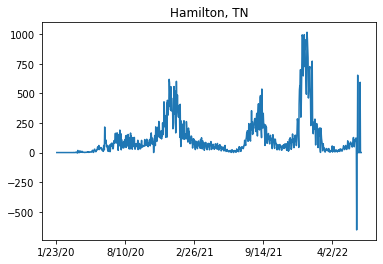

In [ ]:
dfD_daily.loc['Hamilton, Tennessee, US', ].transpose().plot(title="Hamilton, TN")

#Part 7 Explore Global Data set

In [ ]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

In [ ]:
df2['Country/Region']
list(df2['Country/Region'].unique())

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)

In [ ]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [ ]:
df2by_country.head()

In [ ]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [ ]:
### Check if the dataframe contains NaN values
df2by_country.head()

In [ ]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [ ]:
df.head

In [ ]:
? pd.read_csv()

In [ ]:
df2 = pd.read_csv(url, skiprows=5)
df2.head